In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import vice
import seaborn as sns

from statsmodels.distributions import ECDF

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
import surp
from surp import ViceModel

import arya
arya.style.set_size((10/3, 10/3))

In [4]:
giants = pd.read_csv(surp.DATA_DIR + "apogee_cartography.csv", index_col=0)

In [5]:
# Grab cdf
cdf = ECDF(giants.R_gal)

bins = np.arange(0, 20, 0.1)

zones = np.arange(0, 200)
Rs = (0.5 + zones)/10
table = pd.DataFrame({"zone": zones, "R": Rs, "cdf": cdf(bins + 0.1)/cdf(bins + 0.1)[-1]})

In [6]:
fiducial = ViceModel.from_file("../../models/C11_f0.2/model.json").stars_unsampled

In [7]:
fiducial.high_alpha

0         False
1         False
2         False
3         False
4         False
          ...  
131995     True
131996     True
131997     True
131998     True
131999     True
Name: high_alpha, Length: 132000, dtype: bool

# Create matching sample

In [8]:
bins

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [14]:
num = len(giants)
num

25922

In [15]:

sample = pd.DataFrame()
for _ in range(num):
    star = surp.vice_utils.rand_star(fiducial, table, width=0.1)
    sample = pd.concat((sample, star), ignore_index=True)

<Axes: xlabel='r_final', ylabel='Density'>

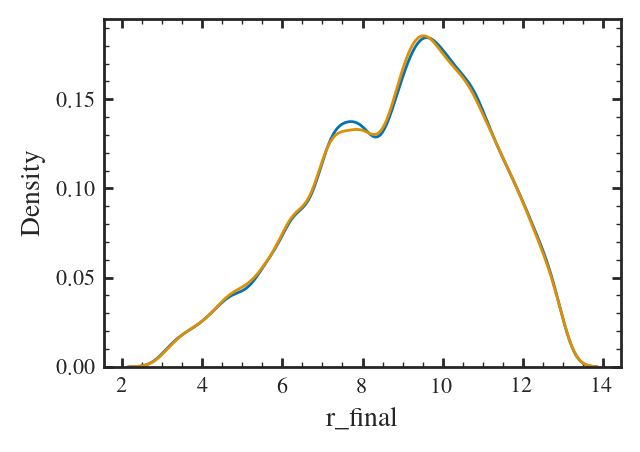

In [16]:
sns.kdeplot(sample.r_final, label="model")
sns.kdeplot(giants.R_gal, label="data")

<Axes: xlabel='r_final', ylabel='Density'>

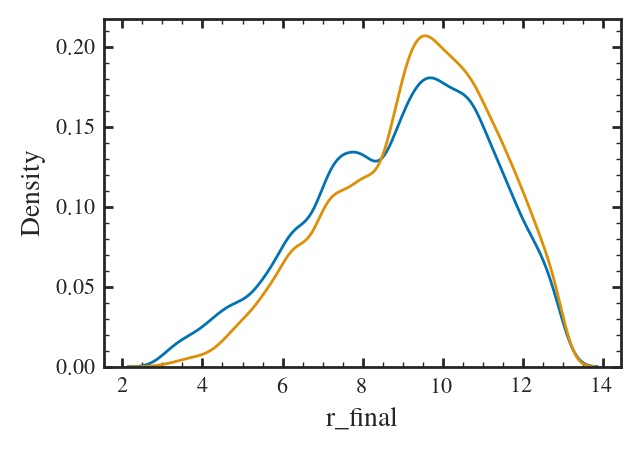

In [71]:
sns.kdeplot(sample[~sample.high_alpha].r_final, label="model")
sns.kdeplot(giants[~giants.high_alpha].R_gal, label="data")

In [17]:
sample.high_alpha = sample.high_alpha.convert_dtypes()

In [40]:
surp.yields.set_magg22_scale()

yields set to Magg et al. 2022 abundances


In [20]:
giants["CPN_MG"] = giants["CPN_H"] - giants.MG_H

In [41]:
sample["C_H"] = sample.C_FE + sample.FE_H
sample["N_H"] = sample.N_FE + sample.FE_H
sample["CPN_H"] = surp.gce_math.cpn(sample.C_H, sample.N_H)
sample["CPN_MG"] = sample.CPN_H - sample.MG_H

In [43]:
w22_x = [-0.6877142487549317, -0.5943260461807127, -0.49556949744518464, -0.403644654291443, -0.2991155164607723, -0.1990734751956536, -0.09569238729707008, 0.00743806998253671, 0.11101319448936031, 0.196316538386909, 0.3030043334842507, 0.40380635146497634]
w22_y = [-0.1377369846524225, -0.07126090881733371, -0.06708396027685826, -0.07602768582606079, -0.06916039723141743, -0.05035811014143843, -0.025880228708997866, -0.0060186578393017776, 0.027469154378573557, 0.0502196810111345, 0.06622329220583811, 0.08085464941318088]

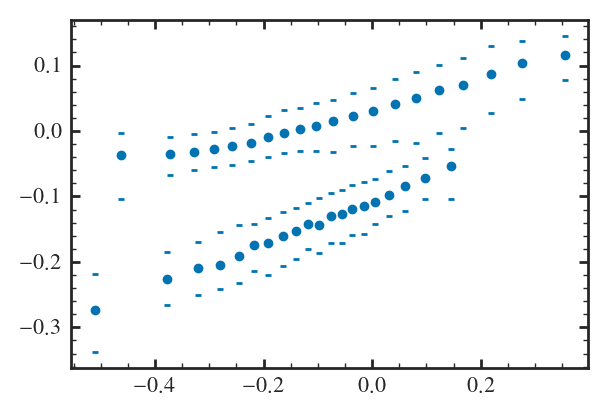

In [44]:
df = giants[giants["high_alpha"]].copy()

arya.medianplot(df, x="MG_H", y="CPN_MG", numbins=20, stat="median", errorbar="pi", label="APOGEE Giants")


df = giants[~giants["high_alpha"]].copy()

arya.medianplot(df, x="MG_H", y="CPN_MG", numbins=20, stat="median", errorbar="pi", label="APOGEE Giants")


In [50]:
np.log10(vice.solar_z("c")/12) + 12 # versus 8.39

8.451018452155457

In [51]:
np.log10(vice.solar_z("n")/14) + 12 # versus 7.78

7.8709053036205425

In [52]:
surp.gce_math.cpn(8.45 - 8.39, 7.78 - 7.87)

0.029153244193628206

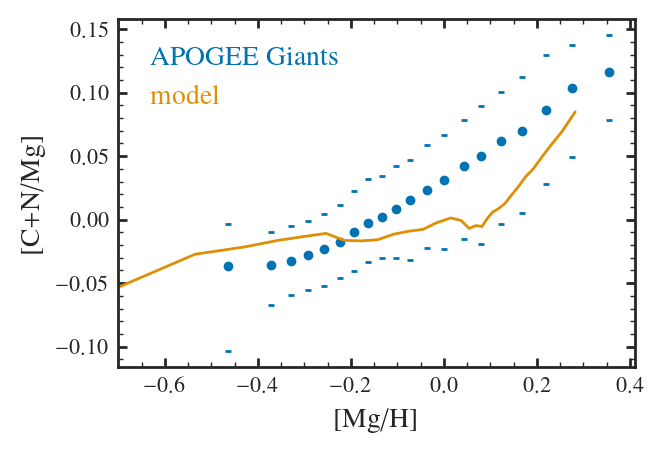

In [60]:
df = giants[~giants["high_alpha"]].copy()

arya.medianplot(df, x="MG_H", y="CPN_MG", numbins=20, stat="median", errorbar="pi", label="APOGEE Giants")

df = sample[~sample.high_alpha].copy()
df["CPN_MG"] += 0.08

arya.medianplot(df, x="MG_H", y="CPN_MG", stat="median", errorbar=None,
    aes="line", numbins=30, label="model", color=arya.COLORS[1])

                                        
plt.xlabel("[Mg/H]")
plt.ylabel("[C+N/Mg]")
plt.xlim(-0.7)

#plt.scatter(w22_x, np.array(w22_y) + 0.029, color=arya.COLORS[2])

arya.Legend(color_only=True)

plt.savefig("c+n.pdf")

# Subgiants

In [63]:
sample_sg = ViceModel.from_file("../../models/C11_f0.2/model.json").stars

In [64]:
def add_cpn(df):
    df["C_H"] = df.C_FE + df.FE_H
    df["N_H"] = df.N_FE + df.FE_H
    df["CPN_H"] = surp.gce_math.cpn(df.C_H, df.N_H)
    df["CPN_MG"] = df.CPN_H - df.MG_H

In [65]:
add_cpn(sample_sg)

In [67]:
subgiants = surp.subgiants

In [68]:
add_cpn(subgiants)

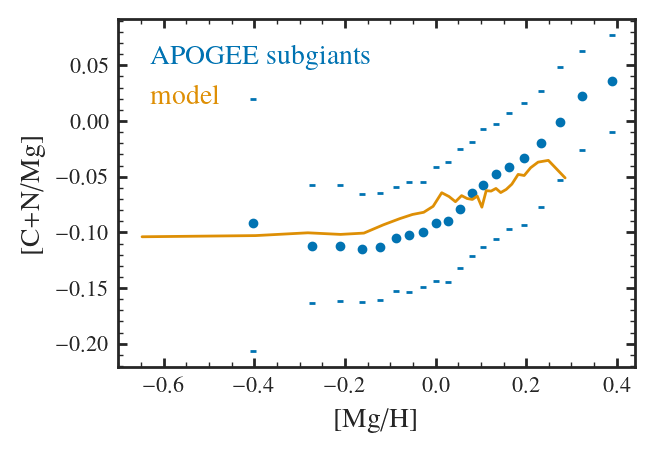

In [70]:
df = subgiants[~subgiants["high_alpha"]].copy()

arya.medianplot(df, x="MG_H", y="CPN_MG", numbins=20, stat="median", errorbar="pi", label="APOGEE subgiants")

df = sample_sg[~sample_sg.high_alpha].copy()

arya.medianplot(df, x="MG_H", y="CPN_MG", stat="median", errorbar=None,
    aes="line", numbins=30, label="model", color=arya.COLORS[1])

                                        
plt.xlabel("[Mg/H]")
plt.ylabel("[C+N/Mg]")
plt.xlim(-0.7)

#plt.scatter(w22_x, np.array(w22_y) + 0.029, color=arya.COLORS[2])

arya.Legend(color_only=True)
